In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ehull_e3nn_unrelaxed_held_B_0 = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/holdout_set_B_sites_predictions.json")
ehull_CGCNN_unrelaxed_held_B_0 = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/holdout_set_B_sites_predictions.json")

ehull_e3nn_unrelaxed_held_B_1 = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_1/holdout_set_B_sites_predictions.json")
ehull_CGCNN_unrelaxed_held_B_1 = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_1/holdout_set_B_sites_predictions.json")

ehull_e3nn_unrelaxed_held_B_2 = pd.read_json("../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_2/holdout_set_B_sites_predictions.json")
ehull_CGCNN_unrelaxed_held_B_2 = pd.read_json("../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_2/holdout_set_B_sites_predictions.json")




In [4]:
m3gnet = ehull_e3nn_unrelaxed_held_B_0.M3Gnet_relaxed_energy_per_atom

In [5]:
import numpy as np

np.save("m3gnet_pred.npy",m3gnet)


In [6]:
e3nn_mean_pred = (ehull_e3nn_unrelaxed_held_B_0.predicted_dft_e_hull + ehull_e3nn_unrelaxed_held_B_1.predicted_dft_e_hull+ehull_e3nn_unrelaxed_held_B_2.predicted_dft_e_hull)/3.0

CGCNN_mean_pred = (ehull_CGCNN_unrelaxed_held_B_0.predicted_dft_e_hull + ehull_CGCNN_unrelaxed_held_B_1.predicted_dft_e_hull+ehull_CGCNN_unrelaxed_held_B_2.predicted_dft_e_hull)/3.0

In [7]:
e3nn_pred = ehull_e3nn_unrelaxed_held_B_0.predicted_dft_e_hull
CGCNN_pred = ehull_CGCNN_unrelaxed_held_B_0.predicted_dft_e_hull

In [6]:
e3nn_mean_pred.shape

(600,)

In [8]:
dft_min_val = {}
e3nn_min_val = {}
CGCNN_min_val = {}

for i in range(len(ehull_e3nn_unrelaxed_held_B_0)):
    curr_formula = ehull_e3nn_unrelaxed_held_B_0.iloc[i].formula
    if curr_formula in e3nn_min_val:
        if e3nn_mean_pred[i] < e3nn_min_val[curr_formula]:
            e3nn_min_val[curr_formula] = e3nn_mean_pred[i]
    else:
        e3nn_min_val[curr_formula] = e3nn_mean_pred[i]
        
for i in range(len(ehull_CGCNN_unrelaxed_held_B_0)):
    curr_formula = ehull_CGCNN_unrelaxed_held_B_0.iloc[i].formula
    if curr_formula in CGCNN_min_val:
        if CGCNN_mean_pred[i] < CGCNN_min_val[curr_formula]:
            CGCNN_min_val[curr_formula] = CGCNN_mean_pred[i]
    else:
        CGCNN_min_val[curr_formula] = CGCNN_mean_pred[i]
        
for i in range(len(ehull_CGCNN_unrelaxed_held_B_0)):
    curr_formula = ehull_CGCNN_unrelaxed_held_B_0.iloc[i].formula
    if curr_formula in dft_min_val:
        if ehull_CGCNN_unrelaxed_held_B_0.iloc[i].dft_e_hull < dft_min_val[curr_formula]:
            dft_min_val[curr_formula] = ehull_CGCNN_unrelaxed_held_B_0.iloc[i].dft_e_hull
    else:
        dft_min_val[curr_formula] = ehull_CGCNN_unrelaxed_held_B_0.iloc[i].dft_e_hull
        

In [9]:
dft_diffs = []
CGCNN_diffs = []
e3nn_diffs = []

for i in range(len(ehull_e3nn_unrelaxed_held_B_0)):
    curr_formula = ehull_e3nn_unrelaxed_held_B_0.iloc[i].formula
    #gs_ref = ehull_e3nn_unrelaxed_held_B.iloc[dft_min_val[curr_formula][0]].predicted_dft_e_hull
    
    curr_val = e3nn_mean_pred[i] - e3nn_min_val[curr_formula]
    e3nn_diffs.append(curr_val)
    
for i in range(len(ehull_CGCNN_unrelaxed_held_B_0)):
    curr_formula = ehull_CGCNN_unrelaxed_held_B_0.iloc[i].formula
    #gs_ref = ehull_CGCNN_unrelaxed_held_B.iloc[dft_min_val[curr_formula][0]].predicted_dft_e_hull
    curr_val = CGCNN_mean_pred[i] - CGCNN_min_val[curr_formula]
    CGCNN_diffs.append(curr_val)
    
for i in range(len(ehull_CGCNN_unrelaxed_held_B_0)):
    curr_formula = ehull_CGCNN_unrelaxed_held_B_0.iloc[i].formula
    curr_val = ehull_CGCNN_unrelaxed_held_B_0.iloc[i].dft_e_hull - dft_min_val[curr_formula]
    dft_diffs.append(curr_val)

In [10]:
import numpy as np

dft_diffs = np.asarray(dft_diffs)
CGCNN_diffs = np.asarray(CGCNN_diffs)
e3nn_diffs = np.asarray(e3nn_diffs)

In [11]:
np.mean(np.abs(dft_diffs-CGCNN_diffs))

0.018800804512333336

In [12]:
np.mean(np.abs(dft_diffs-e3nn_diffs))

0.014106530182277777

/tmp/ipykernel_3485911/428992560.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


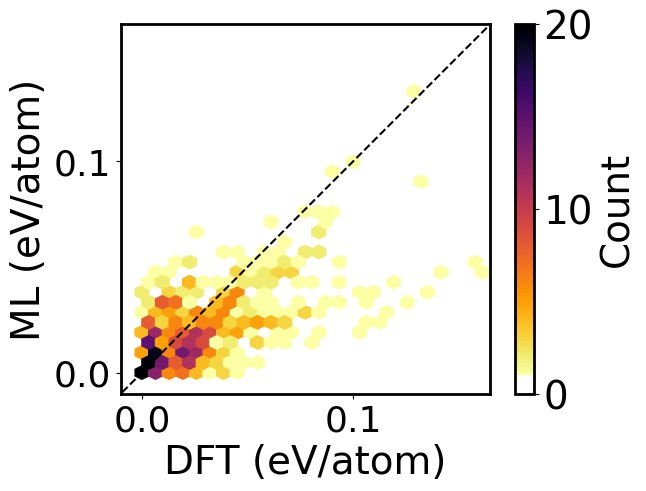

In [13]:
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 2.0

orig_map=plt.cm.get_cmap('inferno')
  
# reversing the original colormap using reversed() function
cmap = orig_map.reversed()
im = plt.hexbin(dft_diffs,e3nn_diffs,cmap=cmap,gridsize=25,mincnt=1,vmax = 20)
plt.plot(np.linspace(-0.05,0.5,100),np.linspace(-0.05,0.5,100),c="black",linestyle="--")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.xlim(-0.01,0.165)
plt.ylim(-0.01,0.165)


plt.xlabel("DFT (eV/atom)",size=28)
plt.ylabel("ML (eV/atom)",size=28)
plt.xticks([0.0,0.1],size=26)
plt.yticks([0.0,0.1],size=26)
#im.figure.axes[0].tick_params(axis="both", labelsize=15)

cbar = plt.colorbar()
#cbar.set_clim(0.0, 10.0)
cbar.set_ticks(ticks = [0,10,20],labels=[0,10,20],fontsize=28)
cbar.set_label(label="Count",size=28)
plt.savefig("Example_two.pdf",bbox_inches="tight")

In [14]:
from sklearn import metrics

In [15]:
np.corrcoef(dft_diffs,CGCNN_diffs)

array([[1.        , 0.56827809],
       [0.56827809, 1.        ]])

In [16]:
np.corrcoef(dft_diffs,e3nn_diffs)

array([[1.        , 0.66282153],
       [0.66282153, 1.        ]])

In [17]:
metrics.r2_score(dft_diffs,CGCNN_diffs)

-0.1508501450624231

In [18]:
metrics.r2_score(dft_diffs,e3nn_diffs)

0.3727431467273532

/tmp/ipykernel_3485911/4242663552.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


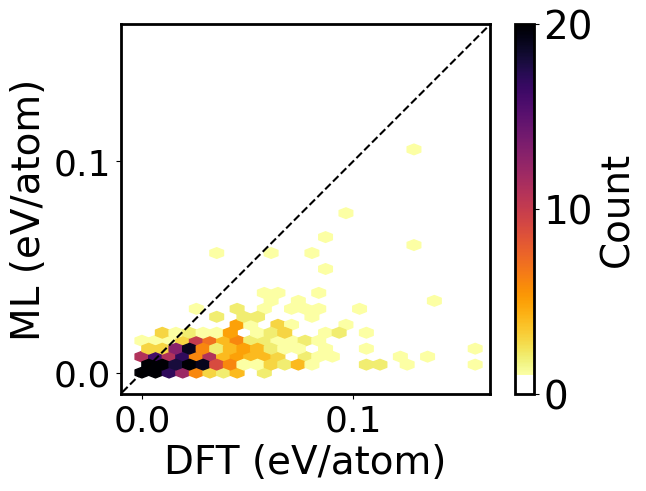

In [19]:
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 2.0

orig_map=plt.cm.get_cmap('inferno')
  
# reversing the original colormap using reversed() function
cmap = orig_map.reversed()
im = plt.hexbin(dft_diffs,CGCNN_diffs,cmap=cmap,gridsize=25,mincnt=1,vmax = 20)
plt.plot(np.linspace(-0.05,0.5,100),np.linspace(-0.05,0.5,100),c="black",linestyle="--")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.xlim(-0.01,0.165)
plt.ylim(-0.01,0.165)


plt.xlabel("DFT (eV/atom)",size=28)
plt.ylabel("ML (eV/atom)",size=28)
plt.xticks([0.0,0.1],size=26)
plt.yticks([0.0,0.1],size=26)
#im.figure.axes[0].tick_params(axis="both", labelsize=15)

cbar = plt.colorbar()
#cbar.set_clim(0.0, 10.0)
cbar.set_ticks(ticks = [0,10,20],labels=[0,10,20],fontsize=28)
cbar.set_label(label="Count",size=28)
plt.savefig("Example_three.pdf",bbox_inches="tight")

In [20]:
np.save("e3nn_mean_pred.npy",e3nn_mean_pred)
np.save("CGCNN_mean_pred.npy",CGCNN_mean_pred)


In [21]:
dft_min_val = {}
e3nn_min_val = {}
CGCNN_min_val = {}

for i in range(len(ehull_e3nn_unrelaxed_held_B_0)):
    curr_formula = ehull_e3nn_unrelaxed_held_B_0.iloc[i].formula
    if curr_formula in e3nn_min_val:
        if e3nn_pred[i] < e3nn_min_val[curr_formula]:
            e3nn_min_val[curr_formula] = e3nn_pred[i]
    else:
        e3nn_min_val[curr_formula] = e3nn_pred[i]
        
for i in range(len(ehull_CGCNN_unrelaxed_held_B_0)):
    curr_formula = ehull_CGCNN_unrelaxed_held_B_0.iloc[i].formula
    if curr_formula in CGCNN_min_val:
        if CGCNN_pred[i] < CGCNN_min_val[curr_formula]:
            CGCNN_min_val[curr_formula] = CGCNN_pred[i]
    else:
        CGCNN_min_val[curr_formula] = CGCNN_pred[i]
        
for i in range(len(ehull_CGCNN_unrelaxed_held_B_0)):
    curr_formula = ehull_CGCNN_unrelaxed_held_B_0.iloc[i].formula
    if curr_formula in dft_min_val:
        if ehull_CGCNN_unrelaxed_held_B_0.iloc[i].dft_e_hull < dft_min_val[curr_formula]:
            dft_min_val[curr_formula] = ehull_CGCNN_unrelaxed_held_B_0.iloc[i].dft_e_hull
    else:
        dft_min_val[curr_formula] = ehull_CGCNN_unrelaxed_held_B_0.iloc[i].dft_e_hull

In [22]:
dft_diffs = []
CGCNN_diffs = []
e3nn_diffs = []

for i in range(len(ehull_e3nn_unrelaxed_held_B_0)):
    curr_formula = ehull_e3nn_unrelaxed_held_B_0.iloc[i].formula
    #gs_ref = ehull_e3nn_unrelaxed_held_B.iloc[dft_min_val[curr_formula][0]].predicted_dft_e_hull
    
    curr_val = e3nn_pred[i] - e3nn_min_val[curr_formula]
    e3nn_diffs.append(curr_val)
    
for i in range(len(ehull_CGCNN_unrelaxed_held_B_0)):
    curr_formula = ehull_CGCNN_unrelaxed_held_B_0.iloc[i].formula
    #gs_ref = ehull_CGCNN_unrelaxed_held_B.iloc[dft_min_val[curr_formula][0]].predicted_dft_e_hull
    curr_val = CGCNN_pred[i] - CGCNN_min_val[curr_formula]
    CGCNN_diffs.append(curr_val)
    
for i in range(len(ehull_CGCNN_unrelaxed_held_B_0)):
    curr_formula = ehull_CGCNN_unrelaxed_held_B_0.iloc[i].formula
    curr_val = ehull_CGCNN_unrelaxed_held_B_0.iloc[i].dft_e_hull - dft_min_val[curr_formula]
    dft_diffs.append(curr_val)

In [23]:

dft_diffs = np.asarray(dft_diffs)
CGCNN_diffs = np.asarray(CGCNN_diffs)
e3nn_diffs = np.asarray(e3nn_diffs)

In [24]:
np.mean(np.abs(dft_diffs-CGCNN_diffs))

0.018218892508

In [25]:
np.mean(np.abs(dft_diffs-e3nn_diffs))

0.014817929522666666

In [26]:
np.corrcoef(dft_diffs,CGCNN_diffs)

array([[1.        , 0.54330778],
       [0.54330778, 1.        ]])

In [27]:
np.corrcoef(dft_diffs,e3nn_diffs)

array([[1.        , 0.59600401],
       [0.59600401, 1.        ]])

In [28]:
metrics.r2_score(dft_diffs,CGCNN_diffs)

-0.12071377349160461

In [29]:
metrics.r2_score(dft_diffs,e3nn_diffs)

0.29704701370943076

In [35]:
dft_ensemble = []
dft_min = []
dft_mean = []
dft_weights = []
dft_diffs = []

CGCNN_ensemble = []
CGCNN_min = []
CGCNN_mean = []
CGCNN_weights = []
CGCNN_diffs = []

e3nn_ensemble = []
e3nn_min = []
e3nn_mean = []
e3nn_weights = []
e3nn_diffs = []

for formula in formula_to_data:
    dft_ensemble.append(formula_to_data[formula]["dft_ensemble"])
    dft_min.append(formula_to_data[formula]["dft_min"])
    dft_mean.append(formula_to_data[formula]["dft_mean"])
    dft_weights.append(formula_to_data[formula]["dft_weights"])
    dft_diffs.append(formula_to_data[formula]["dft_diffs"])
    
    CGCNN_ensemble.append(formula_to_data[formula]["CGCNN_ensemble"])
    CGCNN_min.append(formula_to_data[formula]["CGCNN_min"])
    CGCNN_mean.append(formula_to_data[formula]["CGCNN_mean"])
    CGCNN_weights.append(formula_to_data[formula]["CGCNN_weights"])
    CGCNN_diffs.append(formula_to_data[formula]["CGCNN_diffs"])
    
    e3nn_ensemble.append(formula_to_data[formula]["e3nn_ensemble"])
    e3nn_min.append(formula_to_data[formula]["e3nn_min"])
    e3nn_mean.append(formula_to_data[formula]["e3nn_mean"])
    e3nn_weights.append(formula_to_data[formula]["e3nn_weights"])
    e3nn_diffs.append(formula_to_data[formula]["e3nn_diffs"])

In [36]:
def flatten_comprehension(matrix):
    return [item for row in matrix for item in row]

In [37]:
dft_weights = flatten_comprehension(dft_weights)
CGCNN_weights = flatten_comprehension(CGCNN_weights)
e3nn_weights = flatten_comprehension(e3nn_weights)

dft_diffs = flatten_comprehension(dft_diffs)
CGCNN_diffs = flatten_comprehension(CGCNN_diffs)
e3nn_diffs = flatten_comprehension(e3nn_diffs)

dft_ensemble = np.asarray(dft_ensemble)
dft_min = np.asarray(dft_min)
dft_mean = np.asarray(dft_mean)
dft_weights = np.asarray(dft_weights).reshape(-1)
dft_diffs = np.asarray(dft_diffs).reshape(-1)

CGCNN_ensemble = np.asarray(CGCNN_ensemble)
CGCNN_min = np.asarray(CGCNN_min)
CGCNN_mean = np.asarray(CGCNN_mean)
CGCNN_weights = np.asarray(CGCNN_weights).reshape(-1)
CGCNN_diffs = np.asarray(CGCNN_diffs).reshape(-1)


e3nn_ensemble = np.asarray(e3nn_ensemble)
e3nn_min = np.asarray(e3nn_min)
e3nn_mean = np.asarray(e3nn_mean)
e3nn_weights = np.asarray(e3nn_weights).reshape(-1)
e3nn_diffs = np.asarray(e3nn_diffs).reshape(-1)



In [38]:
np.mean(np.abs(data_ehull_e3nn_unrelaxed_series.predicted_dft_e_hull-data_ehull_e3nn_unrelaxed_series.dft_e_hull))

0.028555505468250295

In [39]:
np.mean(np.abs(data_ehull_CGCNN_unrelaxed_series.predicted_dft_e_hull-data_ehull_CGCNN_unrelaxed_series.dft_e_hull))

0.04366807349837776

In [40]:
np.mean(np.abs(dft_diffs-CGCNN_diffs))

0.02020447007520278

In [41]:
np.mean(np.abs(dft_diffs-e3nn_diffs))

0.017317508108806487

In [42]:
np.mean(np.abs(data_O2P_e3nn_unrelaxed_series.predicted_Op_band_center-data_O2P_e3nn_unrelaxed_series.Op_band_center))

0.21276556104739278

In [43]:
np.mean(np.abs(data_O2P_CGCNN_unrelaxed_series.predicted_Op_band_center-data_O2P_CGCNN_unrelaxed_series.Op_band_center))

0.1761272755566628

In [44]:
np.mean(np.abs(dft_min-dft_ensemble))

0.046930531191681966

In [45]:
np.mean(np.abs(dft_mean-dft_ensemble))

0.081290704979747

In [46]:
np.mean(np.abs(dft_min-dft_mean))

0.11596709221117212

In [47]:
np.mean(np.abs(CGCNN_min-CGCNN_ensemble))

0.009718454540708485

In [48]:
np.mean(np.abs(CGCNN_mean-CGCNN_ensemble))

0.004120436152188082

In [49]:
np.mean(np.abs(CGCNN_min-CGCNN_mean))

0.012431762654427544

In [50]:
np.mean(np.abs(e3nn_min-e3nn_ensemble))

0.028660119104201673

In [51]:
np.mean(np.abs(e3nn_mean-e3nn_ensemble))

0.03712352212703544

In [52]:
np.mean(np.abs(e3nn_min-e3nn_mean))

0.06225279223956034

In [53]:
np.mean(np.abs(CGCNN_ensemble-dft_ensemble))

0.15844127970527444

In [54]:
np.mean(np.abs(e3nn_ensemble-dft_ensemble))

0.22588134848209634